In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
try:
    conn = psycopg2.connect(user="cohort17",
                            password="Cohort17Movies",
                            host="moviesdb.ce8d6g1pa5lm.us-east-1.rds.amazonaws.com",
                            port="5432",database="moviesdb")

    dbquery = "select * from modeling_data2"
    
    df = pd.read_sql_query(dbquery, conn)

except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)

finally:
    if(conn):
        conn.close()

In [3]:
pd.options.display.max_columns = 999
df.dropna(subset=['domesticgross'], inplace=True)
df.head()

,primarytitle,startyear,runtimeminutes,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,releasedate,productionbudget,domesticgross
0,"10,000 BC",2008,109.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Mar 7, 2008",105000000,94784201
1,102 Dalmatians,2000,100.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"Nov 22, 2000",85000000,66941559
2,10 Cloverfield Lane,2016,103.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"Jan 4, 2016",15000000,72082999
3,10 Days in a Madhouse,2015,111.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Nov 11, 2015",12000000,14616
4,10th & Wolf,2006,107.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Aug 18, 2006",8000000,54702


In [4]:
df.describe()

,startyear,runtimeminutes,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,productionbudget,domesticgross
count,2984.000000,2970.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.0,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.0,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.00000,2984.000000,2984.000000,2984.000000,2984.000000,2.984000e+03,2.984000e+03
mean,2009.314678,106.999663,0.270107,0.392091,0.464477,0.211461,0.071381,0.105898,0.167560,0.026810,0.065349,0.157842,0.090818,0.160188,0.078083,0.087802,0.075402,0.103887,0.040885,0.084115,0.032507,0.017426,0.032172,0.0,0.044236,0.056300,0.703418,0.010724,0.010389,0.010389,0.009383,0.011059,0.008378,0.007038,0.009383,0.007373,0.009718,0.007038,0.010054,0.008713,0.006367,0.007708,0.010054,0.008043,0.006032,0.007373,0.006032,0.007708,0.008043,0.007708,0.006367,0.007373,0.006032,0.007708,0.006702,0.005697,0.006702,0.005027,0.005362,0.004692,0.008378,0.006702,0.007038,0.006367,0.004357,0.006702,0.007373,0.006702,0.005697,0.004357,0.005362,0.005027,0.004692,0.005697,0.004021,0.006702,0.0,0.003016,0.003351,0.003016,0.003351,0.003351,0.003351,0.091153,0.08244,0.075402,0.065013,0.064008,0.056971,4.477489e+07,5.763426e+07
std,5.520010,18.205490,0.444089,0.488299,0.498820,0.408413,0.257503,0.307759,0.373538,0.161554,0.247181,0.364654,0.287398,0.366841,0.268347,0.283054,0.264083,0.305166,0.198056,0.277607,0.177371,0.130875,0.176485,0.0,0.205653,0.230539,0.456827,0.103017,0.101411,0.101411,0.096428,0.104596,0.091163,0.083608,0.096428,0.085561,0.098119,0.083608,0.099779,0.092952,0.079554,0.087470,0.099779,0.089336,0.077445,0.085561,0.077445,0.087470,0.089336,0.087470,0.079554,0.085561,0.077445,0.087470,0.081607,0.075276,0.081607,0.070733,0.073041,0.068346,0.091163,0.081607,0.083608,0.079554,0.065871,0.081607,0.085561,0.081607,0.075276,0.065871,0.073041,0.070733,0.068346,0.075276,0.063298,0.081607,0.0,0.054845,0.057802,0.054845,0.057802,0.057802,0.057802,0.287875,0.27508,0.264083,0.246591,0.244808,0.231825,5.016769e+07,8.031871e+07
min,2000.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

(array([1.052e+03, 5.060e+02, 3.890e+02, 2.730e+02, 1.660e+02, 1.100e+02,
        9.100e+01, 7.000e+01, 4.900e+01, 5.000e+01, 4.600e+01, 2.600e+01,
        2.600e+01, 1.800e+01, 1.300e+01, 1.300e+01, 9.000e+00, 9.000e+00,
        9.000e+00, 1.400e+01, 6.000e+00, 7.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0000000e+00, 1.7167460e+07, 3.4334920e+07, 5.1502380e+07,
        6.8669840e+07, 8.5837300e+07, 1.0300476e+08, 1.2017222e+08,
        1.3733968e+08, 1.5450714e+08, 1.7167460e+08, 1.8884206e+08,
        2.0600952e+08, 2.2317698e+08, 2.4034444e+08, 2.5751190e+08,
        2.7467936e+08, 2.9184682e+08, 3.0901428e+08, 3.2618174e+08,
        3.4334920e+08, 3.6051666e+08

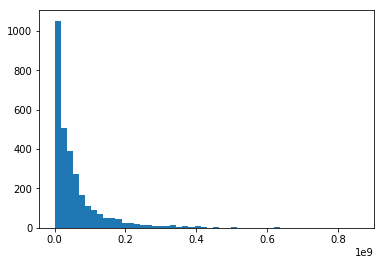

In [5]:
plt.hist(df['domesticgross'], bins=50)

(array([587., 421., 334., 333., 285.,  95., 147., 134.,  65., 103.,  73.,
         29.,  55.,  29.,  24.,  42.,  18.,  15.,  46.,  15.,  21.,  28.,
         11.,  10.,  24.,   7.,   5.,   5.,   4.,   0.,   7.,   2.,   0.,
          4.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([7.0000000e+03, 8.2188600e+06, 1.6430720e+07, 2.4642580e+07,
        3.2854440e+07, 4.1066300e+07, 4.9278160e+07, 5.7490020e+07,
        6.5701880e+07, 7.3913740e+07, 8.2125600e+07, 9.0337460e+07,
        9.8549320e+07, 1.0676118e+08, 1.1497304e+08, 1.2318490e+08,
        1.3139676e+08, 1.3960862e+08, 1.4782048e+08, 1.5603234e+08,
        1.6424420e+08, 1.7245606e+08, 1.8066792e+08, 1.8887978e+08,
        1.9709164e+08, 2.0530350e+08, 2.1351536e+08, 2.2172722e+08,
        2.2993908e+08, 2.3815094e+08, 2.4636280e+08, 2.5457466e+08,
        2.6278652e+08, 2.7099838e+08, 2.7921024e+08, 2.8742210e+08,
        2.9563396e+08, 3.0384582e+08, 3.120576

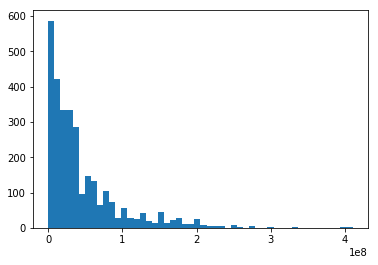

In [6]:
plt.hist(df['productionbudget'], bins=50)

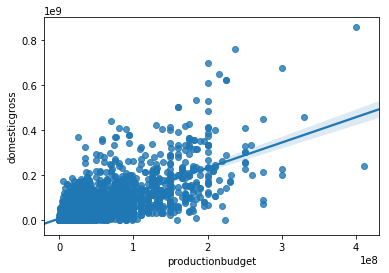

In [7]:
sns.regplot(data=df,x='productionbudget',y='domesticgross')

In [8]:
from sklearn import preprocessing

production_budget = df[['productionbudget']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['prodbudget_scaled'] = min_max_scaler.fit_transform(production_budget)

(array([587., 421., 334., 333., 285.,  95., 147., 134.,  65., 103.,  73.,
         29.,  55.,  29.,  24.,  42.,  18.,  15.,  46.,  15.,  21.,  28.,
         11.,  10.,  24.,   7.,   5.,   5.,   4.,   0.,   7.,   2.,   0.,
          4.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

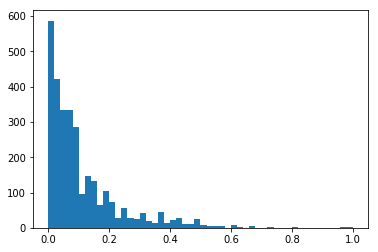

In [9]:
plt.hist(df['prodbudget_scaled'], bins=50)

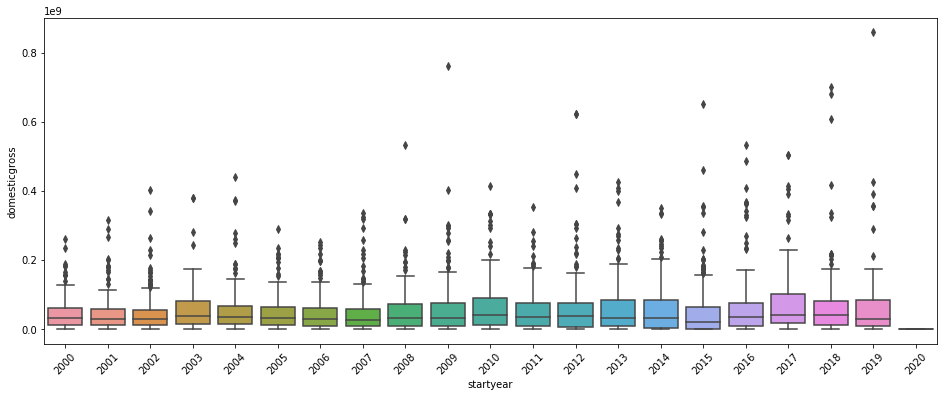

In [10]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='startyear')

In [11]:
df['releasedate']=pd.to_datetime(df['releasedate'])

In [12]:
df['week_number']=df['releasedate'].dt.week

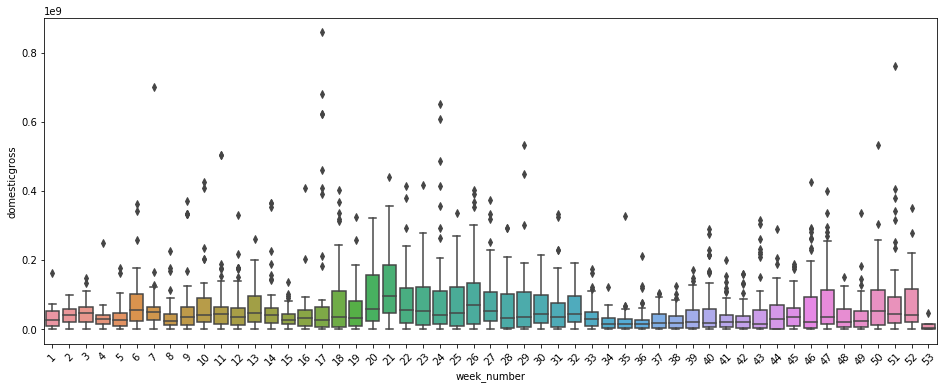

In [13]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.boxplot(data=df,y='domesticgross',x='week_number')

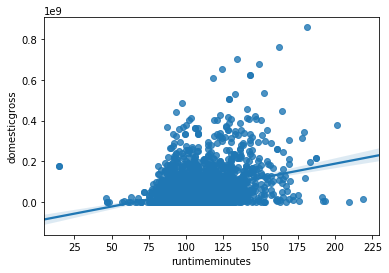

In [14]:
sns.regplot(data=df,x='runtimeminutes',y='domesticgross')

In [15]:
df.head()

,primarytitle,startyear,runtimeminutes,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,releasedate,productionbudget,domesticgross,prodbudget_scaled,week_number
0,"10,000 BC",2008,109.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2008-03-07,105000000,94784201,0.255711,10
1,102 Dalmatians,2000,100.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2000-11-22,85000000,66941559,0.207001,47
2,10 Cloverfield Lane,2016,103.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-01-04,15000000,72082999,0.036515,1
3,10 Days in a Madhouse,2015,111.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-11-11,12000000,14616,0.029209,46
4,10th & Wolf,2006,107.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006-08-18,8000000,54702,0.019467,33


In [16]:
df[df['runtimeminutes'].isnull()]

,primarytitle,startyear,runtimeminutes,action,comedy,drama,adventure,biography,horror,crime,documentary,animation,romance,mystery,thriller,scifi,fantasy,family,threed,animallead,dysfunctionalfamily,africanamerican,marvelcomics,religious,talkinganimals,visualeffects,revenge,male_lead,matt_damon,nicolas_cage,owen_wilson,samuel_l_jackson,mark_wahlberg,adam_sandler,denzel_washington,dwayne_johnson,gerard_butler,george_clooney,ben_stiller,robert_de_niro,bruce_willis,will_smith,ben_affleck,will_ferrell,tom_hanks,tom_cruise,keanu_reeves,leonardo_dicaprio,jake_gyllenhaal,steve_carell,johnny_depp,matthew_mcconaughey,jason_statham,vin_diesel,robert_downey_jr,christian_bale,reese_witherspoon,russell_crowe,ice_cube,sandra_bullock,jackie_chan,cate_blanchett,brad_pitt,john_goodman,channing_tatum,jim_carrey,jack_black,colin_farrell,hugh_jackman,stephen_soderbergh,ridley_scott,steven_spielberg,ron_howard,tim_burton,clint_eastwood,shawn_levy,michael_bay,m_night_shyamalan,martin_scorsese,peter_jackson,guy_ritchie,david_gordon_green,christopher_nolan,todd_phillips,warner_bros,universal,fox,buena_vista,sony,paramount,releasedate,productionbudget,domesticgross,prodbudget_scaled,week_number
36,411,2015,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-01-01,250000,0,0.000592,1
67,Adam,2009,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009-07-29,3200000,2283291,0.007777,31
198,Arctic Dogs,2019,NaN,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-01,50000000,700000,0.121758,44
410,Call of the Wild,2020,NaN,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-21,82000000,0,0.199694,8
1188,Joe,2014,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-04-11,4000000,373375,0.009725,15
1229,Keeping It Real: The Adventures of Greg Walloch,2001,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2001-11-09,100000,1358,0.000227,45
1443,Midway,2019,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-08,59500000,0,0.144895,45
1568,Old Dogs,2009,NaN,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2009-11-25,35000000,49492060,0.085226,48
1985,Sonic the Hedgehog,2020,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-02-14,90000000,0,0.219178,7
2106,Tenet,2020,NaN,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2020-07-17,224000000,0,0.545535,29


In [17]:
median_runtime = df['runtimeminutes'].median()
df['runtimeminutes'].fillna(median_runtime, inplace=True)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,   0.,   2.,
          3.,   3.,   6.,   8.,  34.,  94., 193., 276., 290., 286., 301.,
        297., 236., 185., 222., 137.,  92.,  80.,  55.,  51.,  31.,  19.,
         19.,  12.,   8.,  12.,   9.,   2.,   3.,   3.,   1.,   2.,   3.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 15.  ,  19.08,  23.16,  27.24,  31.32,  35.4 ,  39.48,  43.56,
         47.64,  51.72,  55.8 ,  59.88,  63.96,  68.04,  72.12,  76.2 ,
         80.28,  84.36,  88.44,  92.52,  96.6 , 100.68, 104.76, 108.84,
        112.92, 117.  , 121.08, 125.16, 129.24, 133.32, 137.4 , 141.48,
        145.56, 149.64, 153.72, 157.8 , 161.88, 165.96, 170.04, 174.12,
        178.2 , 182.28, 186.36, 190.44, 194.52, 198.6 , 202.68, 206.76,
        210.84, 214.92, 219.  ]),
 <a list of 50 Patch objects>)

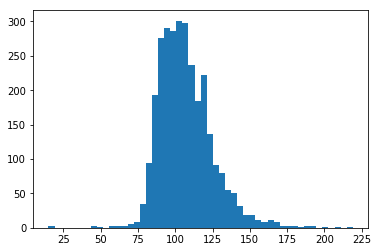

In [18]:
plt.hist(df['runtimeminutes'], bins=50)

In [19]:
runtime_minutes = df[['runtimeminutes']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df['runtime_scaled'] = min_max_scaler.fit_transform(runtime_minutes)

In [20]:
df_model = df.drop(['primarytitle','domesticgross','releasedate','runtimeminutes','productionbudget'], axis=1)
X = df_model.values
y = df['domesticgross'].values

In [21]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_rf = rf_model.predict(X_test)

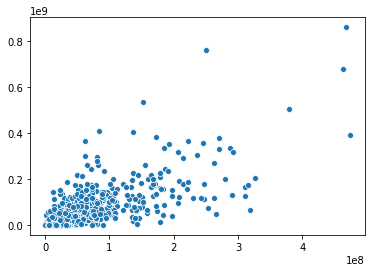

In [23]:
sns.scatterplot(y_rf,y_test)

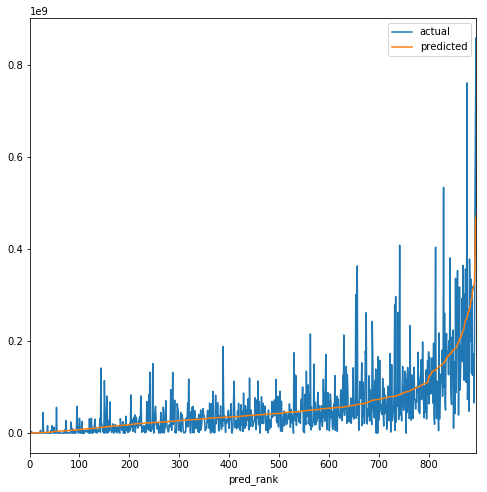

In [24]:
pred_actual_rf = pd.DataFrame({'predicted':y_rf,'actual':y_test})
pred_actual_rf['pred_rank'] = pred_actual_rf['predicted'].rank()
pred_actual_rf.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [46]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_rf)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_rf)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_rf))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf)))

Mean Absolute Error 32,650,696
Mean Squared Error 3,160,256,316,651,280
Root Mean Squared Error 56,216,157
Mean Value of Target 55,400,517
StDev of Target 81,626,346
R-Squared 0.526


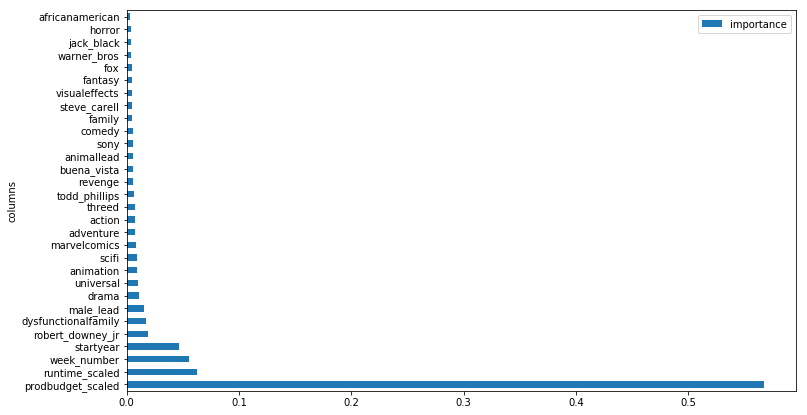

In [26]:
importance = pd.DataFrame({'columns':df_model.columns,'importance': rf_model.feature_importances_})
importance.sort_values('importance',ascending=False,inplace=True)
importance[:30].plot('columns','importance','barh',figsize=(12,7))

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_grid = {'bootstrap': [True, False],
               'max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4, 8],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 150]}
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

y_rf_random = rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


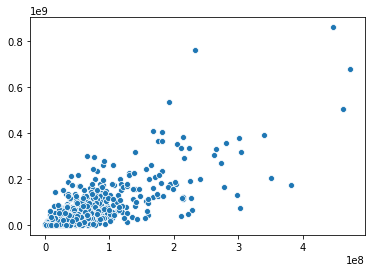

In [52]:
sns.scatterplot(y_rf_random,y_test)

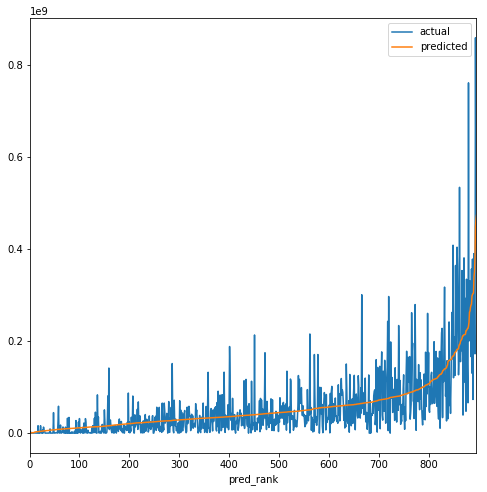

In [53]:
pred_actual_rf_random = pd.DataFrame({'predicted':y_rf_random,'actual':y_test})
pred_actual_rf_random['pred_rank'] = pred_actual_rf_random['predicted'].rank()
pred_actual_rf_random.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf_random.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf_random.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [54]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_rf_random)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_rf_random)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_rf_random))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf_random)))

Mean Absolute Error 31,891,444
Mean Squared Error 2,828,543,864,997,433
Root Mean Squared Error 53,184,056
Mean Value of Target 55,400,517
StDev of Target 81,626,346
R-Squared 0.575


In [27]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
en_model.fit(X_train, y_train)
y_en = en_model.predict(X_test)

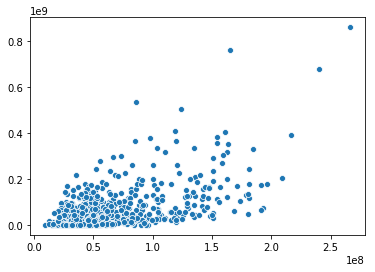

In [28]:
sns.scatterplot(y_en,y_test)

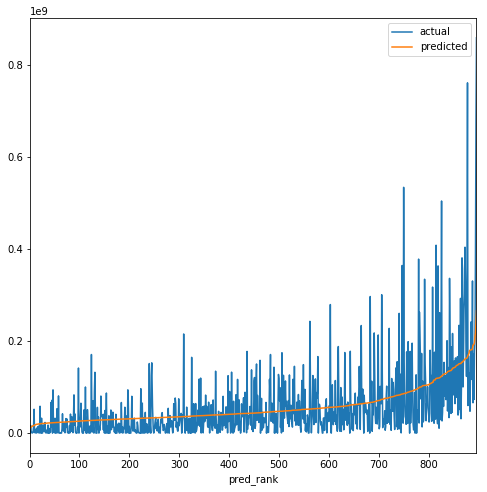

In [29]:
pred_actual_en = pd.DataFrame({'predicted':y_en,'actual':y_test})
pred_actual_en['pred_rank'] = pred_actual_en['predicted'].rank()
pred_actual_en.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_en.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_en.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [47]:
print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y_test,y_en)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y_test,y_en)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_en))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_en)))

Mean Absolute Error 40,981,778
Mean Squared Error 4,414,646,904,669,735
Root Mean Squared Error 66,442,809
Mean Value of Target 55,400,517
StDev of Target 81,626,346
R-Squared 0.337


In [31]:
en_model_coefs = pd.DataFrame({'Feature':df_model.columns,'Coefficient':en_model.coef_})
en_model_coefs.sort_values('Coefficient',ascending=False,inplace=True)
en_model_coefs

,Feature,Coefficient
88,prodbudget_scaled,5.137351e+07
16,threed,3.685610e+07
20,marvelcomics,2.605230e+07
4,adventure,2.482973e+07
90,runtime_scaled,2.413398e+07
85,buena_vista,2.251316e+07
13,scifi,2.237759e+07
52,robert_downey_jr,1.394912e+07
23,visualeffects,1.339223e+07
83,universal,1.291223e+07


In [32]:
df[importance['columns'][:30]]

,prodbudget_scaled,runtime_scaled,week_number,startyear,robert_downey_jr,dysfunctionalfamily,male_lead,drama,universal,animation,scifi,marvelcomics,adventure,action,threed,todd_phillips,revenge,buena_vista,animallead,sony,comedy,family,steve_carell,visualeffects,fantasy,fox,warner_bros,jack_black,horror,africanamerican
0,0.255711,0.460784,10,2008,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.207001,0.416667,47,2000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
2,0.036515,0.431373,1,2016,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.029209,0.470588,46,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.019467,0.450980,33,2006,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.043822,0.387255,44,2010,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.048693,0.455882,13,2009,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0.085226,0.563725,3,2018,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0.048693,0.583333,42,2013,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0.090097,0.406863,17,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [33]:
df_model2 = df[importance['columns'][:30]]
X2 = df[importance['columns'][:30]].values
y2 = df['domesticgross'].values

In [34]:
from  sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf2_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf2_model.fit(X2_train, y2_train)
y_rf2 = rf2_model.predict(X2_test)

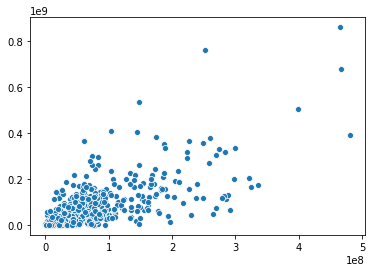

In [36]:
sns.scatterplot(y_rf2,y2_test)

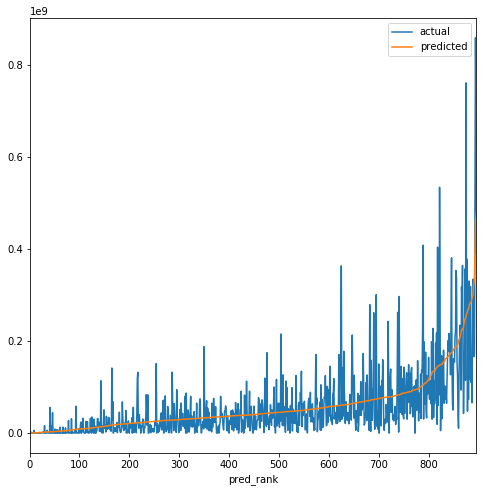

In [37]:
pred_actual_rf2 = pd.DataFrame({'predicted':y_rf2,'actual':y_test})
pred_actual_rf2['pred_rank'] = pred_actual_rf2['predicted'].rank()
pred_actual_rf2.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_rf2.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_rf2.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [48]:
from sklearn import metrics

print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y2_test,y_rf2)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y2_test,y_rf2)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y2_test,y_rf2))))
print('Mean Value of Target', "{:,.0f}".format(y_test.mean()))
print('StDev of Target', "{:,.0f}".format(y_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_rf2)))

Mean Absolute Error 33,687,983
Mean Squared Error 3,226,723,211,040,927
Root Mean Squared Error 56,804,253
Mean Value of Target 55,400,517
StDev of Target 81,626,346
R-Squared 0.516


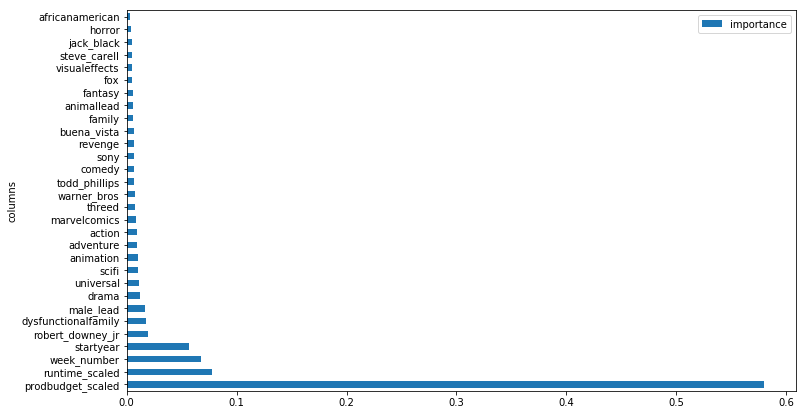

In [39]:
importance2 = pd.DataFrame({'columns':df_model2.columns,'importance': rf2_model.feature_importances_})
importance2.sort_values('importance',ascending=False,inplace=True)
importance2.plot('columns','importance','barh',figsize=(12,7))

In [40]:
from sklearn.linear_model import ElasticNet

en2_model = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
en2_model.fit(X2_train, y2_train)
y_en2 = en2_model.predict(X2_test)

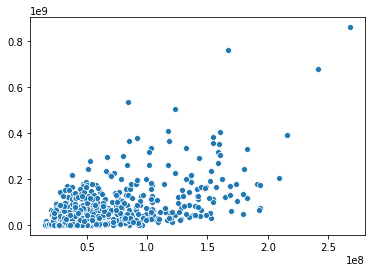

In [41]:
sns.scatterplot(y_en2,y2_test)

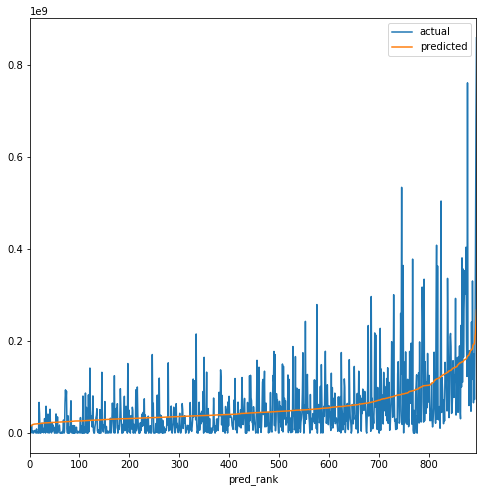

In [42]:
pred_actual_en2 = pd.DataFrame({'predicted':y_en2,'actual':y2_test})
pred_actual_en2['pred_rank'] = pred_actual_en2['predicted'].rank()
pred_actual_en2.sort_values(by=['pred_rank'],inplace=True)

plt.figure(figsize=(8, 8))
ax=plt.gca()
pred_actual_en2.plot(kind='line',x='pred_rank',y='actual',ax=ax)
pred_actual_en2.plot(kind='line',x='pred_rank',y='predicted',ax=ax)

In [49]:
print('Mean Absolute Error', "{:,.0f}".format(metrics.mean_absolute_error(y2_test,y_en2)))
print('Mean Squared Error', "{:,.0f}".format(metrics.mean_squared_error(y2_test,y_en2)))
print('Root Mean Squared Error', "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y2_test,y_en2))))
print('Mean Value of Target', "{:,.0f}".format(y2_test.mean()))
print('StDev of Target', "{:,.0f}".format(y2_test.std()))
print('R-Squared', "{:,.3f}".format(metrics.r2_score(y_test,y_en2)))

Mean Absolute Error 41,292,574
Mean Squared Error 4,450,260,045,111,257
Root Mean Squared Error 66,710,269
Mean Value of Target 55,400,517
StDev of Target 81,626,346
R-Squared 0.332


In [44]:
en2_model_coefs = pd.DataFrame({'Feature':df_model2.columns,'Coefficient':en2_model.coef_})
en2_model_coefs.sort_values('Coefficient',ascending=False,inplace=True)
en2_model_coefs

,Feature,Coefficient
0,prodbudget_scaled,5.250344e+07
14,threed,3.729898e+07
12,adventure,2.659617e+07
11,marvelcomics,2.611168e+07
1,runtime_scaled,2.457998e+07
10,scifi,2.368024e+07
17,buena_vista,2.255647e+07
4,robert_downey_jr,1.384396e+07
23,visualeffects,1.363850e+07
8,universal,1.305076e+07


In [ ]:
#import pickle

#Dump a Scikit-Learn Fitted Estimator to disk
#with open(path, 'wb') as f:
#    pickle.dump(model,f)

#Load a Scikit-Learn Fitted Estimator from disk
#with open(path, 'rb') as f:
#    model = pickle.load(f)
